# One-factor Analysis of Variance

# 1. Data import

In [1]:
import pandas as pd

df = pd.read_excel('Resistance (one factor).xlsx')
df.head()

,A,Resistance
0,1,1.93
1,1,2.38
2,1,2.20
3,1,2.25
4,2,2.55


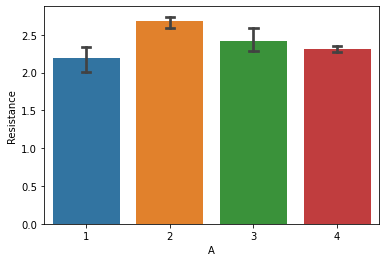

In [7]:
# reference: https://seaborn.pydata.org/generated/seaborn.barplot.html
import seaborn as sns
ax=sns.barplot(x=df['A'],y=df['Resistance'],capsize=.1) # the cap is SE

# 2. Analysis

## 2.1 Analysis of variance

In [ ]:
# ANOVA results with combinations of 2 groups:
import statsmodels.api as sm
from statsmodels.formula.api import ols
lm = ols('Resistance ~ C(A)', df).fit()
table = sm.stats.anova_lm(lm)
print(table)

## 2.2. Post-hoc test

In [12]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# perform multiple pairwise comparison (Tukey HSD)
m_comp = pairwise_tukeyhsd(endog=df['Resistance'], groups=df['A'], alpha=0.05)
print(m_comp)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     1      2     0.49 0.0018  0.1939  0.7861   True
     1      3     0.23  0.151 -0.0661  0.5261  False
     1      4     0.12 0.6262 -0.1761  0.4161  False
     2      3    -0.26 0.0924 -0.5561  0.0361  False
     2      4    -0.37 0.0137 -0.6661 -0.0739   True
     3      4    -0.11 0.6797 -0.4061  0.1861  False
----------------------------------------------------
